#BASE

In [0]:
import pandas as pd

URI_TREINO = "https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true"
URI_TESTE = "https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv"
URI_DESAFIOQT = "https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv"

dados_treino = pd.read_csv(URI_TREINO)
dados_teste = pd.read_csv(URI_TESTE)
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)

erro_treino = "Erro ao carregar dados de treino"
erro_teste = "Erro ao carregar dados de teste"
erro_desafioqt = "Erro ao carregar dados de submissão"

assert dados_treino.shape == (150000, 5), erro_treino
assert dados_teste.shape == (20000, 5), erro_teste
assert dados_desafioqt.shape == (10000, 5), erro_desafioqt

In [0]:
coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

X_treino = dados_treino[coluna_features].to_numpy()
Y_treino = dados_treino[coluna_label].to_numpy()
X_teste = dados_teste[coluna_features].to_numpy()
Y_teste = dados_teste[coluna_label].to_numpy()

In [0]:
#Exemplo de classificação com Dummy
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

modelo_dummy = DummyRegressor()
modelo_dummy.fit(X_treino, Y_treino)
dummy_predicoes = modelo_dummy.predict(X_teste)

avaliacao_dummy = mean_squared_error(Y_teste, dummy_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_dummy}")

Minha avaliação nos dados de teste foi de 5219.286870186777


#TESTES NA DISPUTA

##Teste 21 NuSVR - 2 lugar 

In [0]:
from sklearn.svm import NuSVR
modelo21 = NuSVR(C=1, nu=1)
modelo21.fit(X_treino, Y_treino)

NuSVR(C=1, cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=1, shrinking=True, tol=0.001, verbose=False)

In [0]:
predicoes_modelo21= modelo21.predict(X_teste)
avaliacao21 = mean_squared_error(Y_teste, predicoes_modelo21)
print(f"Minha avaliação nos dados de teste foi de {avaliacao21}")
modelo21.score(X_teste, Y_teste)

Minha avaliação nos dados de teste foi de 2110.222027944132


0.5956653343139953

In [0]:
print(predicoes_modelo21[:5])
print(Y_teste[:5])

[536.28770857 459.71404    634.54905013 515.34401297 558.18418346]
[550.  406.3 652.3 469.1 580.5]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


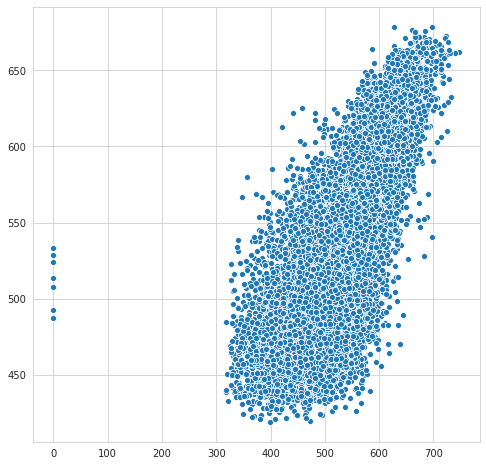

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x= Y_teste, y = predicoes_modelo21 )

## Teste 22 - SVR not the winner anymore

In [0]:
from sklearn.svm import SVR
modelo22 = SVR()
modelo22.fit(X_treino, Y_treino)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
predicoes_modelo22= modelo22.predict(X_teste)
avaliacao22 = mean_squared_error(Y_teste, predicoes_modelo22)
print(f"Minha avaliação nos dados de teste foi de {avaliacao22}")
modelo22.score(X_teste, Y_teste)
print(predicoes_modelo22[:5])
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2110.1659855384887
[536.2648346  459.80081621 634.49325503 515.34346597 558.1516241 ]
[550.  406.3 652.3 469.1 580.5]


In [0]:
#testando outros parâmetros
from sklearn.svm import SVR
modelo22a = SVR(kernel='linear', C=0.1, epsilon=0.01, shrinking=False)
modelo22a.fit(X_treino, Y_treino)

In [0]:
#predicoes_modelo22a= modelo22a.predict(X_teste)
#avaliacao22a = mean_squared_error(Y_teste, predicoes_modelo22a)
#print(f"Minha avaliação nos dados de teste foi de {avaliacao22a}")
#modelo22a.score(X_teste, Y_teste)
#print(predicoes_modelo22a[:5])
#print(Y_teste[:5])

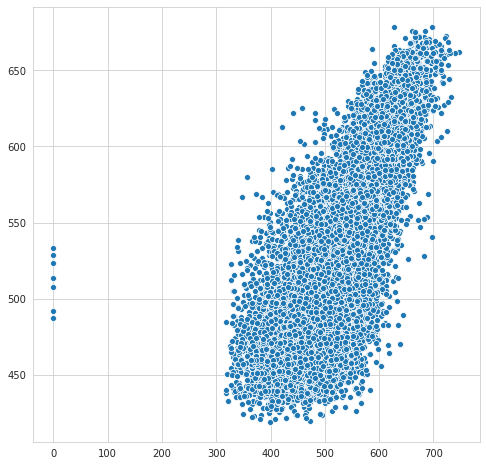

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x= Y_teste, y = predicoes_modelo22 )

#TESTES DESCARTADOS
Comparando modelos - fonte
- https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

##Teste 1 - Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor
modelo1 = DecisionTreeRegressor()
modelo1.fit(X_treino, Y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
predicoes_modelo1 = modelo1.predict(X_teste)
avaliacao1 = mean_squared_error(Y_teste, predicoes_modelo1)

print(f"Minha avaliação nos dados de teste foi de {avaliacao1}")

Minha avaliação nos dados de teste foi de 4218.5439615


In [0]:
modelo1.score(X_teste, Y_teste)

0.19169474123223648

##Teste 2 - Bayesian Regression - #4lugar
-nenhuma melhora aparente mudando os parâmetros

In [0]:
from sklearn import linear_model

modelo2 = linear_model.BayesianRidge(verbose=True)
modelo2.fit(X_treino, Y_treino)

Convergence after  1  iterations


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=True)

In [0]:
predicoes_modelo2 = modelo2.predict(X_teste)
avaliacao2 = mean_squared_error(Y_teste, predicoes_modelo2)

print(f"Minha avaliação nos dados de teste foi de {avaliacao2}")

Minha avaliação nos dados de teste foi de 2177.3848723376304


In [0]:
modelo2.score(X_teste, Y_teste)

0.582796420107454

In [0]:
print(predicoes_modelo2[:5])
print(Y_teste[:5])

[536.78479787 454.52090659 652.30515176 512.2557146  551.66487343]
[550.  406.3 652.3 469.1 580.5]


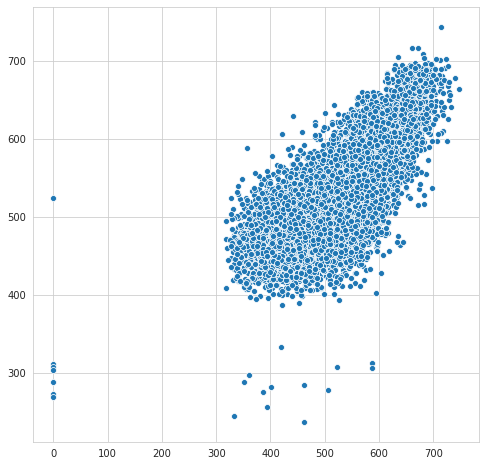

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x= Y_teste, y = predicoes_modelo2 )

## Teste 3 - Linear SVR (com o mesmo C e iterações da melhor versão nos desafios da aula 5

In [0]:
from sklearn.svm import LinearSVR
modelo3 = LinearSVR(C=0.2, max_iter=10000)
modelo3.fit(X_treino, Y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=0.2, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
predicoes_modelo3 = modelo3.predict(X_teste)
avaliacao3 = mean_squared_error(Y_teste, predicoes_modelo3)

print(f"Minha avaliação nos dados de teste foi de {avaliacao3}")

Minha avaliação nos dados de teste foi de 2186.622296804423


In [0]:
modelo3.score(X_teste, Y_teste)

0.5810264589924053

In [0]:
#melhor versão de teste
from sklearn.svm import LinearSVR
modelo3 = LinearSVR(C=0.01,
                    max_iter=2000,
                    dual=False,
                    random_state=0,
                    intercept_scaling=11000,
                    loss='squared_epsilon_insensitive',
                    epsilon=0.1999,
                    tol=1e-10)
modelo3.fit(X_treino, Y_treino)
predicoes_modelo3= modelo3.predict(X_teste)
avaliacao3 = mean_squared_error(Y_teste, predicoes_modelo3)
print(f"Minha avaliação nos dados de teste foi de {avaliacao3}")
modelo3.score(X_teste, Y_teste)
print(predicoes_modelo3[:5].round(1))
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2177.3695514476126
[536.8 454.5 652.3 512.2 551.7]
[550.  406.3 652.3 469.1 580.5]


## Teste 4 - Ridge #3lugar
-ficou melhor que os lassos, por pouco

In [0]:
 #original
 from sklearn import linear_model
 modelo4 = linear_model.Ridge(alpha=.5)
 modelo4.fit(X_treino, Y_treino)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
predicoes_modelo4 = modelo4.predict(X_teste)
avaliacao4 = mean_squared_error(Y_teste, predicoes_modelo4)

print(f"Minha avaliação nos dados de teste foi de {avaliacao4}")

print(predicoes_modelo4[:5])
print(Y_teste[:5])
modelo4.score(X_teste, Y_teste)

Minha avaliação nos dados de teste foi de 2177.3839304212784
[536.78452137 454.5185493  652.30640266 512.25729101 551.66548466]
[550.  406.3 652.3 469.1 580.5]


0.5827966005858247

In [0]:
 #parâmetros alterados
 modelo4 = linear_model.Ridge(alpha=0.0000000001, max_iter=1000, tol=0.00001, normalize=True, solver='saga')
 modelo4.fit(X_treino, Y_treino)

Ridge(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, random_state=None, solver='saga', tol=1e-05)

In [0]:
predicoes_modelo4 = modelo4.predict(X_teste)
avaliacao4 = mean_squared_error(Y_teste, predicoes_modelo4)

print(f"Minha avaliação nos dados de teste foi de {avaliacao4}")

print(predicoes_modelo4[:5])
print(Y_teste[:5])
modelo4.score(X_teste, Y_teste)

Minha avaliação nos dados de teste foi de 2177.383911097156
[536.78448227 454.5185478  652.30634285 512.25732411 551.66550476]
[550.  406.3 652.3 469.1 580.5]


0.5827966042884742

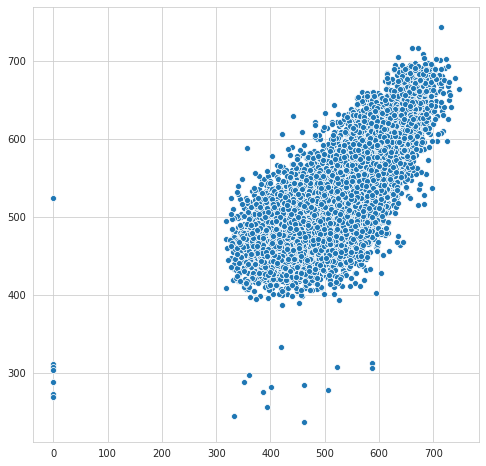

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x= Y_teste, y = predicoes_modelo4 )

In [0]:
#seguem os testes descartados

## Teste 8 - Lasso = #4lugar - não chegou ao mesmo que o LassoLarsIC

In [0]:
#original
from sklearn import linear_model
modelo8 = linear_model.Lasso(alpha=0.1)
modelo8.fit(X_treino, Y_treino)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
predicoes_modelo8 = modelo8.predict(X_teste)
avaliacao8 = mean_squared_error(Y_teste, predicoes_modelo8)

print(f"Minha avaliação nos dados de teste foi de {avaliacao8}")
modelo8.score(X_teste, Y_teste)
print(predicoes_modelo8[:5])
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2177.3842225145304
[536.78406452 454.51967236 652.30473805 512.25784391 551.66553945]
[550.  406.3 652.3 469.1 580.5]


In [0]:
#parâmetros alterados
from sklearn import linear_model
modelo8 = linear_model.Lasso(alpha=0.00000001, precompute=True, random_state=0, tol=0.00001, normalize=True)
modelo8.fit(X_treino, Y_treino)

Lasso(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=True, random_state=0,
      selection='cyclic', tol=1e-05, warm_start=False)

In [0]:
predicoes_modelo8 = modelo8.predict(X_teste)
avaliacao8 = mean_squared_error(Y_teste, predicoes_modelo8)

print(f"Minha avaliação nos dados de teste foi de {avaliacao8}")
modelo8.score(X_teste, Y_teste)
print(predicoes_modelo8[:5])
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2177.3839309691652
[536.78452021 454.51855457 652.30639163 512.25729405 551.66548304]
[550.  406.3 652.3 469.1 580.5]


## Teste 9 LassoLarsIC #2lugar
-não mudou 
-igual a vários outros testes




In [0]:
#parâmetro original
from sklearn import linear_model
modelo9 = linear_model.LassoLarsIC(criterion='bic', verbose=True)
modelo9.fit(X_treino, Y_treino)

.

LassoLarsIC(copy_X=True, criterion='bic', eps=2.220446049250313e-16,
            fit_intercept=True, max_iter=500, normalize=True, positive=False,
            precompute='auto', verbose=True)

In [0]:
predicoes_modelo9= modelo9.predict(X_teste)
avaliacao9 = mean_squared_error(Y_teste, predicoes_modelo9)

print(f"Minha avaliação nos dados de teste foi de {avaliacao9}")
modelo9.score(X_teste, Y_teste)
print(predicoes_modelo9[:5])
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2177.3839304103562
[536.78452136 454.51854927 652.30640267 512.25729102 551.66548467]
[550.  406.3 652.3 469.1 580.5]


In [0]:
#parâmetros alterados
from sklearn import linear_model
modelo9 = linear_model.LassoLarsIC(criterion='aic', normalize=True, fit_intercept=True, eps=0.0000000001, positive=True, max_iter=1000, verbose=True)
modelo9.fit(X_treino, Y_treino)

.

LassoLarsIC(copy_X=True, criterion='aic', eps=1e-10, fit_intercept=True,
            max_iter=1000, normalize=True, positive=True, precompute='auto',
            verbose=True)

In [0]:
predicoes_modelo9= modelo9.predict(X_teste)
avaliacao9 = mean_squared_error(Y_teste, predicoes_modelo9)

print(f"Minha avaliação nos dados de teste foi de {avaliacao9}")
modelo9.score(X_teste, Y_teste)
print(predicoes_modelo9[:5])
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2177.3839304103562
[536.78452136 454.51854927 652.30640267 512.25729102 551.66548467]
[550.  406.3 652.3 469.1 580.5]


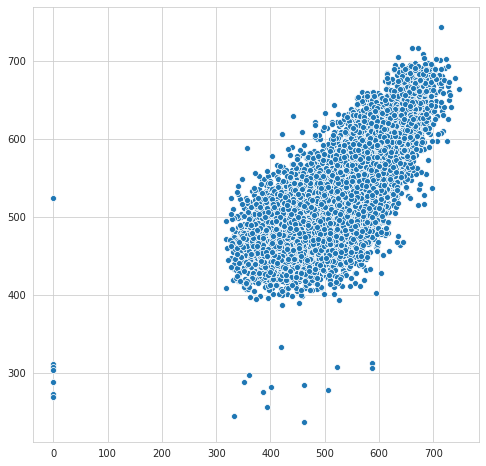

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x= Y_teste, y = predicoes_modelo9 )

##Teste 10 - ElasticNet #5lugar - pode melhorar com outros parâmetros
-ficou praticamente igual ao modelo 12

In [0]:
from sklearn.linear_model import ElasticNet
modelo10 = ElasticNet(random_state=0)
modelo10.fit(X_treino, Y_treino)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
predicoes_modelo10= modelo10.predict(X_teste)
avaliacao10 = mean_squared_error(Y_teste, predicoes_modelo10)

print(f"Minha avaliação nos dados de teste foi de {avaliacao10}")
modelo10.score(X_teste, Y_teste)
print(predicoes_modelo10[:5])
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2177.3889221018035
[536.78415138 454.53162772 652.2945252  512.25600104 551.66312049]
[550.  406.3 652.3 469.1 580.5]


In [0]:
#testando com outros parâmetros
from sklearn.linear_model import ElasticNet
modelo10 = ElasticNet(random_state=0, alpha=0.0000000001, normalize=False, l1_ratio=1, precompute=True, tol=0.00001,max_iter=1500)
modelo10.fit(X_treino, Y_treino)

ElasticNet(alpha=1e-10, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1500, normalize=False, positive=False, precompute=True,
           random_state=0, selection='cyclic', tol=1e-05, warm_start=False)

In [0]:
predicoes_modelo10= modelo10.predict(X_teste)
avaliacao10 = mean_squared_error(Y_teste, predicoes_modelo10)

print(f"Minha avaliação nos dados de teste foi de {avaliacao10}")
modelo10.score(X_teste, Y_teste)
print(predicoes_modelo10[:5])
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2177.3839304103567
[536.78452136 454.51854927 652.30640267 512.25729102 551.66548467]
[550.  406.3 652.3 469.1 580.5]


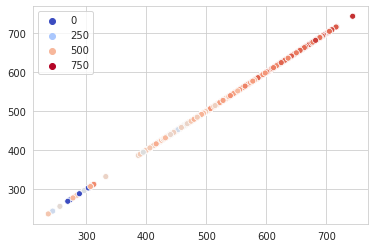

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x= predicoes_modelo12, y = predicoes_modelo10, hue=Y_teste, palette='coolwarm')
plt.show()

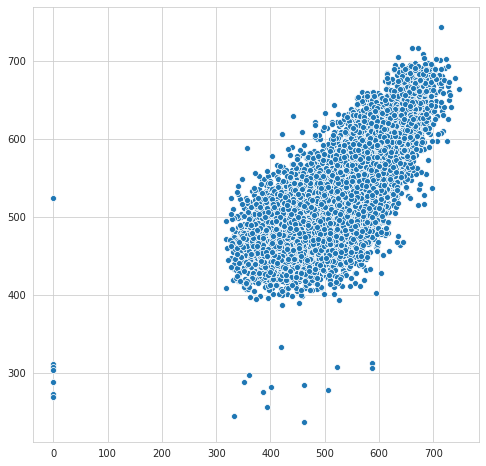

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x= Y_teste, y = predicoes_modelo10 )


##Teste 11 - ElasticNetCV #6lugar - vale testar com outros parâmetros

In [0]:
#teste original
from sklearn.linear_model import ElasticNetCV
modelo11 = ElasticNetCV(cv=5, random_state=0)
modelo11.fit(X_treino, Y_treino)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)

In [0]:
predicoes_modelo11= modelo11.predict(X_teste)
avaliacao11 = mean_squared_error(Y_teste, predicoes_modelo11)

print(f"Minha avaliação nos dados de teste foi de {avaliacao11}")
modelo11.score(X_teste, Y_teste)
print(predicoes_modelo11[:5])
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2177.482325667446
[536.80537523 454.71222912 652.12871836 512.24325275 551.6065745 ]
[550.  406.3 652.3 469.1 580.5]


In [0]:
#mudando parâmetros
from sklearn.linear_model import ElasticNetCV
modelo11 = ElasticNetCV(cv=10, random_state=0, verbose=True, l1_ratio=1, n_alphas=1000)
modelo11.fit(X_treino, Y_treino)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=1, max_iter=1000, n_alphas=1000, n_jobs=None,
             normalize=False, positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=True)

In [0]:
predicoes_modelo11= modelo11.predict(X_teste)
avaliacao11 = mean_squared_error(Y_teste, predicoes_modelo11)

print(f"Minha avaliação nos dados de teste foi de {avaliacao11}")
modelo11.score(X_teste, Y_teste)
print(predicoes_modelo11[:5])
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2177.4492169923456
[536.79824144 454.65090561 652.16130705 512.28424499 551.62243466]
[550.  406.3 652.3 469.1 580.5]


In [0]:
#melhor teste
from sklearn.linear_model import ElasticNetCV
modelo11 = ElasticNetCV(cv=None,
                        random_state=127,
                        l1_ratio=0.9,
                        n_alphas=1000,
                        eps=1e-4,
                        selection='random',
                        tol=1e-2)
modelo11.fit(X_treino, Y_treino)
predicoes_modelo11= modelo11.predict(X_teste)
avaliacao11 = mean_squared_error(Y_teste, predicoes_modelo11)
print(f"Minha avaliação nos dados de teste foi de {avaliacao11}")
modelo11.score(X_teste, Y_teste)
print(predicoes_modelo11[:5].round(1))
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2177.3758962066827
[536.8 454.5 652.3 512.3 551.7]
[550.  406.3 652.3 469.1 580.5]


##Teste 12 - LassoLARS #7lugar 
- ficou próximo ao modelo 22 após a mudança de parâmetros
- ficou exatamente igual ao teste 13 com parâmetros alterados
- roda mais rápido que o modelo 13 - ainda está no jogo

In [0]:
#teste original
from sklearn import linear_model
modelo12 = linear_model.LassoLars(alpha=0.01)
modelo12.fit(X_treino, Y_treino)


LassoLars(alpha=0.01, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
          positive=False, precompute='auto', verbose=False)

In [0]:
predicoes_modelo12= modelo12.predict(X_teste)
avaliacao12 = mean_squared_error(Y_teste, predicoes_modelo12)

print(f"Minha avaliação nos dados de teste foi de {avaliacao12}")
modelo12.score(X_teste, Y_teste)

Minha avaliação nos dados de teste foi de 2200.782002233399


0.5783133512316949

In [0]:
print(predicoes_modelo12[:5])
print(Y_teste[:5])

[535.82683892 459.90377733 641.21796095 515.27362545 549.85476448]
[550.  406.3 652.3 469.1 580.5]


In [0]:
#mudando parâmetros
from sklearn import linear_model
modelo12 = linear_model.LassoLars(alpha=0.0000000001, verbose=True, positive=True, max_iter=1000, precompute=True)
modelo12.fit(X_treino, Y_treino)

LassoLars(alpha=1e-10, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=1000, normalize=True,
          positive=True, precompute=True, verbose=True)

In [0]:
predicoes_modelo12= modelo12.predict(X_teste)
avaliacao12 = mean_squared_error(Y_teste, predicoes_modelo12)

print(f"Minha avaliação nos dados de teste foi de {avaliacao12}")
modelo12.score(X_teste, Y_teste)

Minha avaliação nos dados de teste foi de 2177.3839304103562


0.5827966005879175

In [0]:
print(predicoes_modelo12[:5])
print(Y_teste[:5])

[536.78452136 454.51854927 652.30640267 512.25729102 551.66548467]
[550.  406.3 652.3 469.1 580.5]


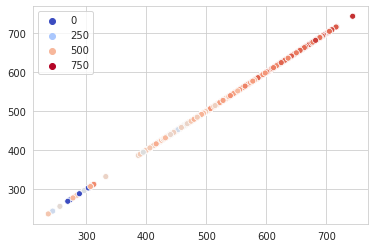

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x= predicoes_modelo12, y = predicoes_modelo13a, hue=Y_teste, palette='coolwarm')
plt.show()

##Teste 13 - OrthogonalMatchingPursuit #8 lugar modelo 13a fica bem próximo do modelo 22 (atual campeão) - modelo 12 alterado ficou exatamente igual usando menos tempo, por isso descartamos este modelo

###teste padrão OrthogonalMatchingPursuit

In [0]:
from sklearn.linear_model import OrthogonalMatchingPursuit
modelo13 = OrthogonalMatchingPursuit()
modelo13.fit(X_treino, Y_treino)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [0]:
predicoes_modelo13= modelo13.predict(X_teste)
avaliacao13 = mean_squared_error(Y_teste, predicoes_modelo13)
print(f"Minha avaliação nos dados de teste foi de {avaliacao13}")
modelo13.score(X_teste, Y_teste)
print(predicoes_modelo13[:5])
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2687.0239206095102
[533.92658444 446.61376092 622.19818713 549.52272568 548.24435345]
[550.  406.3 652.3 469.1 580.5]


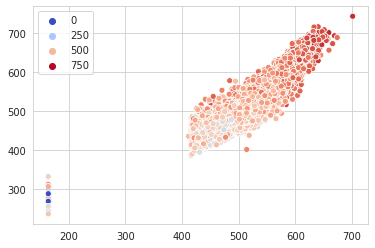

In [0]:
sns.scatterplot(x= predicoes_modelo13, y = predicoes_modelo13a, hue=Y_teste, palette='coolwarm')
plt.show()

###teste parâmetros OrthogonalMatchingPursuit

In [0]:
modelo13a = OrthogonalMatchingPursuit(tol=0.1)
modelo13a.fit(X_treino, Y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_omp.py:673: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=0.1)

In [0]:
predicoes_modelo13a= modelo13a.predict(X_teste)
avaliacao13a = mean_squared_error(Y_teste, predicoes_modelo13a)
print(f"Minha avaliação nos dados de teste foi de {avaliacao13a}")
modelo13a.score(X_teste, Y_teste)
print(predicoes_modelo13a[:5])
print(Y_teste[:5])

Minha avaliação nos dados de teste foi de 2177.3839304103562
[536.78452136 454.51854927 652.30640267 512.25729102 551.66548467]
[550.  406.3 652.3 469.1 580.5]


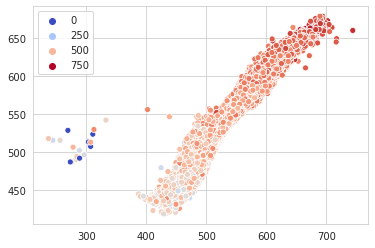

In [0]:
sns.scatterplot(x= predicoes_modelo13a, y = predicoes_modelo22, hue=Y_teste, palette='coolwarm')
plt.show()

##Teste 16 - SGD Regressor 

In [0]:
#not good
from sklearn import linear_model
modelo16 = linear_model.SGDRegressor(alpha=1, tol=1e-3)
modelo16.fit(X_treino, Y_treino)

SGDRegressor(alpha=1, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [0]:
predicoes_modelo16= modelo16.predict(X_teste)
avaliacao16 = mean_squared_error(Y_teste, predicoes_modelo16)
print(f"Minha avaliação nos dados de teste foi de {avaliacao16}")
modelo16.score(X_teste, Y_teste)

Minha avaliação nos dados de teste foi de 7.592988912467712e+27


-1.4548746969868395e+24

In [0]:
print(predicoes_modelo16[:5])
print(Y_teste[:5])

[8.42916354e+13 7.47642970e+13 9.14433893e+13 8.47629547e+13
 8.85286487e+13]
[550.  406.3 652.3 469.1 580.5]


In [0]:
#melhor avaliação usando este Regressor
from sklearn import linear_model
modelo16 = linear_model.SGDRegressor(alpha=1, tol=1e-5, loss='huber', learning_rate='adaptive', random_state=0, eta0=0.1)
modelo16.fit(X_treino, Y_treino)
predicoes_modelo16= modelo16.predict(X_teste)
avaliacao16 = mean_squared_error(Y_teste, predicoes_modelo16)
print(f"Minha avaliação nos dados de teste foi de {avaliacao16}")
print(modelo16.score(X_teste, Y_teste))
print((predicoes_modelo16[:5]).round(1))
print((Y_teste[:5]).round(1))

Minha avaliação nos dados de teste foi de 2185.0283800362745
0.5813318656249997
[538.4 452.6 656.6 514.1 553.6]
[550.  406.3 652.3 469.1 580.5]


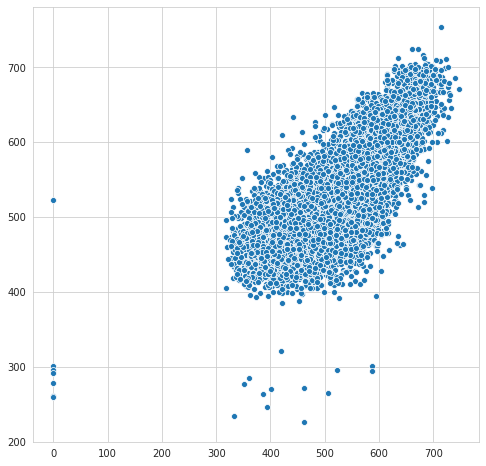

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x= Y_teste, y = predicoes_modelo16 )

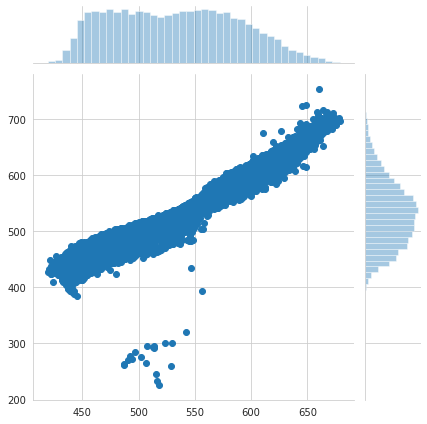

In [0]:
sns.jointplot(x= predicoes_modelo22, y = predicoes_modelo16, kind='scatter')

##Teste 17 - Passive Agressive

In [0]:
from sklearn.linear_model import PassiveAggressiveRegressor
modelo17 = PassiveAggressiveRegressor(max_iter=100, random_state=0)
modelo17.fit(X_treino, Y_treino)

PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=100,
                           n_iter_no_change=5, random_state=0, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
predicoes_modelo17= modelo17.predict(X_teste)
avaliacao17 = mean_squared_error(Y_teste, predicoes_modelo17)
print(f"Minha avaliação nos dados de teste foi de {avaliacao17}")
modelo17.score(X_teste, Y_teste)

Minha avaliação nos dados de teste foi de 2997.6772008383227


0.42562214175331736

In [0]:
#melhor mean_square_error
#Passive Agressive
from sklearn.linear_model import PassiveAggressiveRegressor
modelo17 = PassiveAggressiveRegressor(C=2.70,
                                      max_iter=10000,
                                      tol=1,
                                      random_state=0,
                                      shuffle=True,
                                      loss='squared_epsilon_insensitive')
modelo17.fit(X_treino, Y_treino)
predicoes_modelo17= modelo17.predict(X_teste)
avaliacao17 = mean_squared_error(Y_teste, predicoes_modelo17)
print(f"Minha avaliação nos dados de teste foi de {avaliacao17}")
print(modelo17.score(X_teste, Y_teste))
print((predicoes_modelo17[:5]).round(1))
print((Y_teste[:5]).round(1))

Minha avaliação nos dados de teste foi de 2447.803749281875
0.5309820968957115
[523.5 443.1 672.1 491.3 552.4]
[550.  406.3 652.3 469.1 580.5]


##Teste 18 Huber Regressor - ainda no score 0.58

In [0]:
from sklearn.linear_model import HuberRegressor
modelo18 = HuberRegressor(alpha=0.000000001)
modelo18.fit(X_treino, Y_treino)

HuberRegressor(alpha=1e-09, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [0]:
predicoes_modelo18= modelo18.predict(X_teste)
avaliacao18 = mean_squared_error(Y_teste, predicoes_modelo18)
print(f"Minha avaliação nos dados de teste foi de {avaliacao18}")
modelo18.score(X_teste, Y_teste)

Minha avaliação nos dados de teste foi de 2188.169784460128


0.5807299485325406

In [0]:
print(predicoes_modelo18[:5])
print(Y_teste[:5])

[539.10291758 455.82248518 654.33313141 517.04585778 554.25496751]
[550.  406.3 652.3 469.1 580.5]


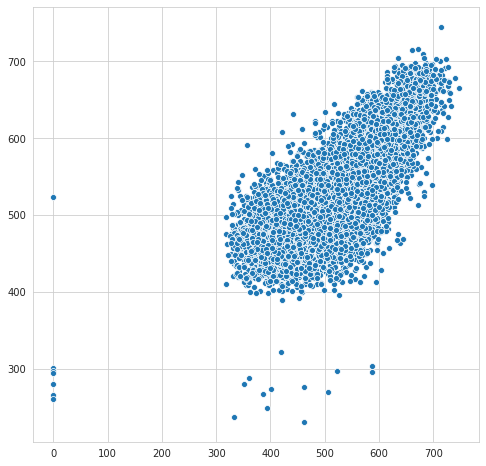

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x= Y_teste, y = predicoes_modelo18 )

## Teste 19 - Theil Sen Regression - performou até bem, mas bem pesado pra rodar

In [0]:
from sklearn.linear_model import TheilSenRegressor
modelo19 = TheilSenRegressor(random_state=0, verbose=True)
modelo19.fit(X_treino, Y_treino)

Breakdown point: 0.12944598471889712
Number of samples: 150000
Tolerable outliers: 19416
Number of subpopulations: 10000


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=None, n_subsamples=None,
                  random_state=0, tol=0.001, verbose=True)

In [0]:
predicoes_modelo19= modelo19.predict(X_teste)
avaliacao19 = mean_squared_error(Y_teste, predicoes_modelo19)
print(f"Minha avaliação nos dados de teste foi de {avaliacao19}")
modelo19.score(X_teste, Y_teste)

Minha avaliação nos dados de teste foi de 2195.225754703646


0.5793779707161195

In [0]:
#mudando parâmetros - not enough
from sklearn.linear_model import TheilSenRegressor
modelo19 = TheilSenRegressor(random_state=0, verbose=True, max_subpopulation=21000)
modelo19.fit(X_treino, Y_treino)

Breakdown point: 0.12944598471889712
Number of samples: 150000
Tolerable outliers: 19416
Number of subpopulations: 21000


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=21000, n_jobs=None, n_subsamples=None,
                  random_state=0, tol=0.001, verbose=True)

In [0]:
predicoes_modelo19= modelo19.predict(X_teste)
avaliacao19 = mean_squared_error(Y_teste, predicoes_modelo19)
print(f"Minha avaliação nos dados de teste foi de {avaliacao19}")
modelo19.score(X_teste, Y_teste)

Minha avaliação nos dados de teste foi de 2188.6242169681204


0.580642875791491

In [0]:
print(predicoes_modelo19[:5])
print(Y_teste[:5])

[539.89135248 452.39145106 654.17088411 513.32947111 551.57267238]
[550.  406.3 652.3 469.1 580.5]


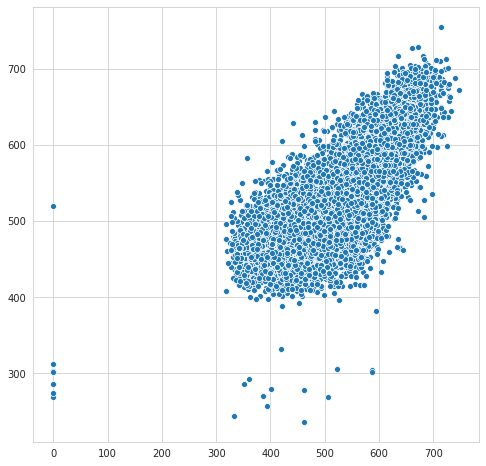

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x= Y_teste, y = predicoes_modelo19 )

#TESTES COM ERRO

##Teste 5 sklearn.gaussian_process.GaussianProcessRegressor¶ = Muito pesado para o Colab

In [0]:
#muito pesado pro Colab
#from sklearn.gaussian_process import GaussianProcessRegressor
#modelo5 = GaussianProcessRegressor()
#modelo5.fit(X_treino, Y_treino)

##Teste 6 RegressorChain = não acertei os parâmetros

In [0]:
#flopou. Provavelmente não se usa para o tipo de dados que estou usando
#from sklearn.multioutput import RegressorChain
#modelo6 = RegressorChain(base_estimator=1)
#modelo6.fit(X_treino, Y_treino)

In [0]:
#predicoes_modelo6 = modelo6.predict(X_teste)
#avaliacao6 = mean_squared_error(Y_teste, predicoes_modelo6)

#print(f"Minha avaliação nos dados de teste foi de {avaliacao6}")
#modelo6.score(X_teste, Y_teste)

## Teste 14 - ARDR Regression = Muito pesado para o Colab

In [0]:
#crashou o colab
#from sklearn import linear_model
#modelo14 = linear_model.ARDRegression()
#modelo14.fit(X_treino, Y_treino)

In [0]:
#predicoes_modelo14= modelo14.predict(X_teste)
#avaliacao14 = mean_squared_error(Y_teste, predicoes_modelo14)
#print(f"Minha avaliação nos dados de teste foi de {avaliacao14}")
#modelo14.score(X_teste, Y_teste)

## Teste 15 - Logistic Regression =deu erro de valor

In [0]:
#erro de valor
#from sklearn.linear_model import LogisticRegression
#modelo15 = LogisticRegression(random_state=0)
#modelo15.fit(X_treino, Y_treino)

In [0]:
#predicoes_modelo15= modelo15.predict(X_teste)
#avaliacao15 = mean_squared_error(Y_teste, predicoes_modelo15)
#print(f"Minha avaliação nos dados de teste foi de {avaliacao15}")
#modelo15.score(X_teste, Y_teste)

##Teste 20 - Kernel Ridge = Crashou o Colab

In [0]:
#crahou o Colab
#from sklearn.kernel_ridge import KernelRidge
#modelo20 = KernelRidge(alpha=1.0)
#modelo20.fit(X_treino, Y_treino)

In [0]:
#predicoes_modelo20= modelo20.predict(X_teste)
#avaliacao20 = mean_squared_error(Y_teste, predicoes_modelo20)
#print(f"Minha avaliação nos dados de teste foi de {avaliacao20}")
#modelo20.score(X_teste, Y_teste)


##Teste 23 - Isotonic Regression - não funciona de 4 pra um


In [0]:
#from sklearn.isotonic import IsotonicRegression
#modelo23 = IsotonicRegression()
#modelo23.fit(Y_treino, X_treino)

In [0]:
#predicoes_modelo23= modelo23.predict(X_teste)
#avaliacao23 = mean_squared_error(Y_teste, predicoes_modelo23)
#print(f"Minha avaliação nos dados de teste foi de {avaliacao23}")
#modelo22.score(X_teste, Y_teste)

#Vendo a base modelo com dois testes

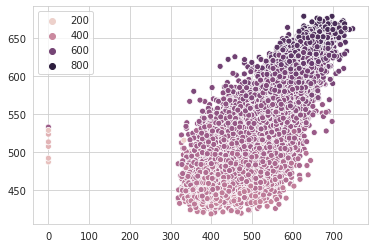

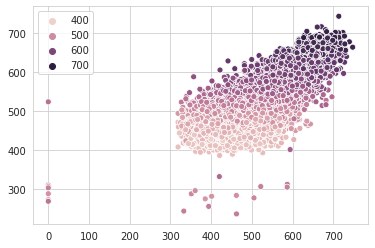

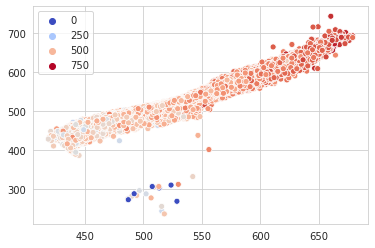

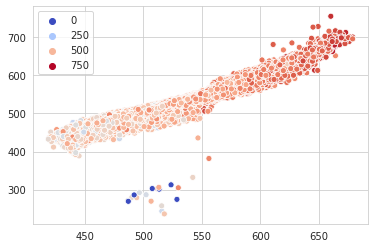

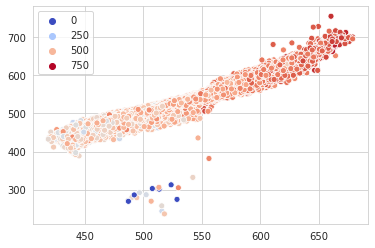

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.scatterplot(x= Y_teste, y = predicoes_modelo22, hue=predicoes_modelo9 )
plt.show()
sns.scatterplot(x= Y_teste, y = predicoes_modelo9, hue=predicoes_modelo22)
plt.show()
sns.scatterplot(x= predicoes_modelo22, y = predicoes_modelo9, hue=Y_teste, palette='coolwarm')
plt.show()
sns.scatterplot(x= predicoes_modelo22, y = predicoes_modelo19, hue=Y_teste, palette='coolwarm')
plt.show()
sns.scatterplot(x= predicoes_modelo21, y = predicoes_modelo19, hue=Y_teste, palette='coolwarm')
plt.show()



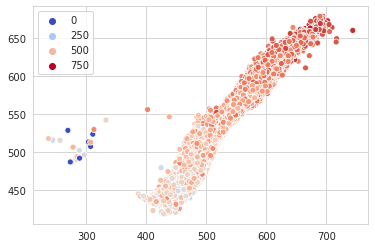

In [0]:
sns.scatterplot(x= predicoes_modelo2, y = predicoes_modelo22, hue=Y_teste, palette='coolwarm')
plt.show()

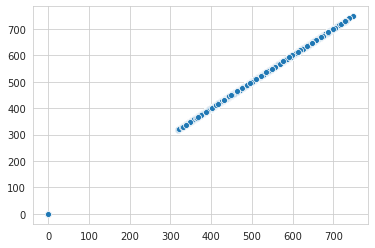

In [0]:
sns.scatterplot(x= Y_teste, y =Y_teste)
plt.show()

In [0]:
avaliacao_teste = mean_squared_error(predicoes_modelo9, predicoes_modelo22)
print(f"Minha avaliação nos dados de teste foi de {avaliacao_teste}")

Minha avaliação nos dados de teste foi de 182.2130211016075
